In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [2]:
# Reading in the data
from google.colab import files
uploaded = files.upload()

Saving KAG_conversion_data.csv to KAG_conversion_data.csv


In [3]:
# Saving data to dataframe
df = pd.read_csv('KAG_conversion_data.csv')

# Defining the Objective

For this project I will be trying to determine if targeting a specific age group leads to higher click through rates. We will do AB testing on a set of two age groups, as well as all four age groups in the data to determine which age group has the highest click-through-rate.

The dataset can be found here:
https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

# Exploratory Analysis

## Data Overview

### Shape

In [4]:
# Shape of the dataset
print(f"\nThe data frame has {df.shape[0]} rows and {df.shape[1]} columns")


The data frame has 1143 rows and 11 columns


### Viewing data

In [5]:
# Viewing the data
print(df.head())

    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  


### Nulls

In [6]:
# Viewing nulls
df.isnull().any()

ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
age                    False
gender                 False
interest               False
Impressions            False
Clicks                 False
Spent                  False
Total_Conversion       False
Approved_Conversion    False
dtype: bool

### Data types

In [7]:
# View datatypes
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

## Summary Statistics

In [8]:
# Isolate numerical and categorical variables
numerical = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
categorical = ['age', 'gender', 'interest']

### Mean, Median, Mode, and Standard Dev for Numerical Variables

In [9]:
# Printing summary stats for each column
for i in numerical:
  print(f"Column: {i}")
  print(f"Mean: {df[i].mean()}")
  print(f"Median: {df[i].median()}")
  print(f"Mode: {df[i].mode()[0]}")
  print(f"StDev: {df[i].std()}\n")

Column: Impressions
Mean: 186732.1329833771
Median: 51509.0
Mode: 152
StDev: 312762.1832081964

Column: Clicks
Mean: 33.39020122484689
Median: 8.0
Mode: 0
StDev: 56.8924383035575

Column: Spent
Mean: 51.36065613141295
Median: 12.36999989
Mode: 0.0
StDev: 86.90841793584877

Column: Total_Conversion
Mean: 2.8556430446194225
Median: 1.0
Mode: 1
StDev: 4.483593472024835

Column: Approved_Conversion
Mean: 0.9440069991251093
Median: 1.0
Mode: 0
StDev: 1.737708005905004



### Counts of categorical variables

In [10]:
# Distributions of categorical variables
for i in categorical:
  print(f"Column '{i}'")
  unique_elements = df[i].unique()
  for j in unique_elements:
    print(f"Value: '{j}' has {df[df[i] == j][i].count()} instances")
  print()

Column 'age'
Value: '30-34' has 426 instances
Value: '35-39' has 248 instances
Value: '40-44' has 210 instances
Value: '45-49' has 259 instances

Column 'gender'
Value: 'M' has 592 instances
Value: 'F' has 551 instances

Column 'interest'
Value: '15' has 51 instances
Value: '16' has 140 instances
Value: '20' has 49 instances
Value: '28' has 51 instances
Value: '29' has 77 instances
Value: '27' has 60 instances
Value: '31' has 25 instances
Value: '7' has 24 instances
Value: '30' has 25 instances
Value: '24' has 24 instances
Value: '21' has 36 instances
Value: '32' has 33 instances
Value: '18' has 43 instances
Value: '63' has 46 instances
Value: '65' has 19 instances
Value: '25' has 26 instances
Value: '10' has 85 instances
Value: '19' has 32 instances
Value: '26' has 41 instances
Value: '36' has 21 instances
Value: '23' has 23 instances
Value: '64' has 48 instances
Value: '22' has 33 instances
Value: '2' has 25 instances
Value: '66' has 11 instances
Value: '100' has 6 instances
Value: '

## Data Visualizations

### Histograms of numerical variables



<ipython-input-11-d42e8698d408>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (column_name, column_data) in enumerate(df[numerical].iteritems()):


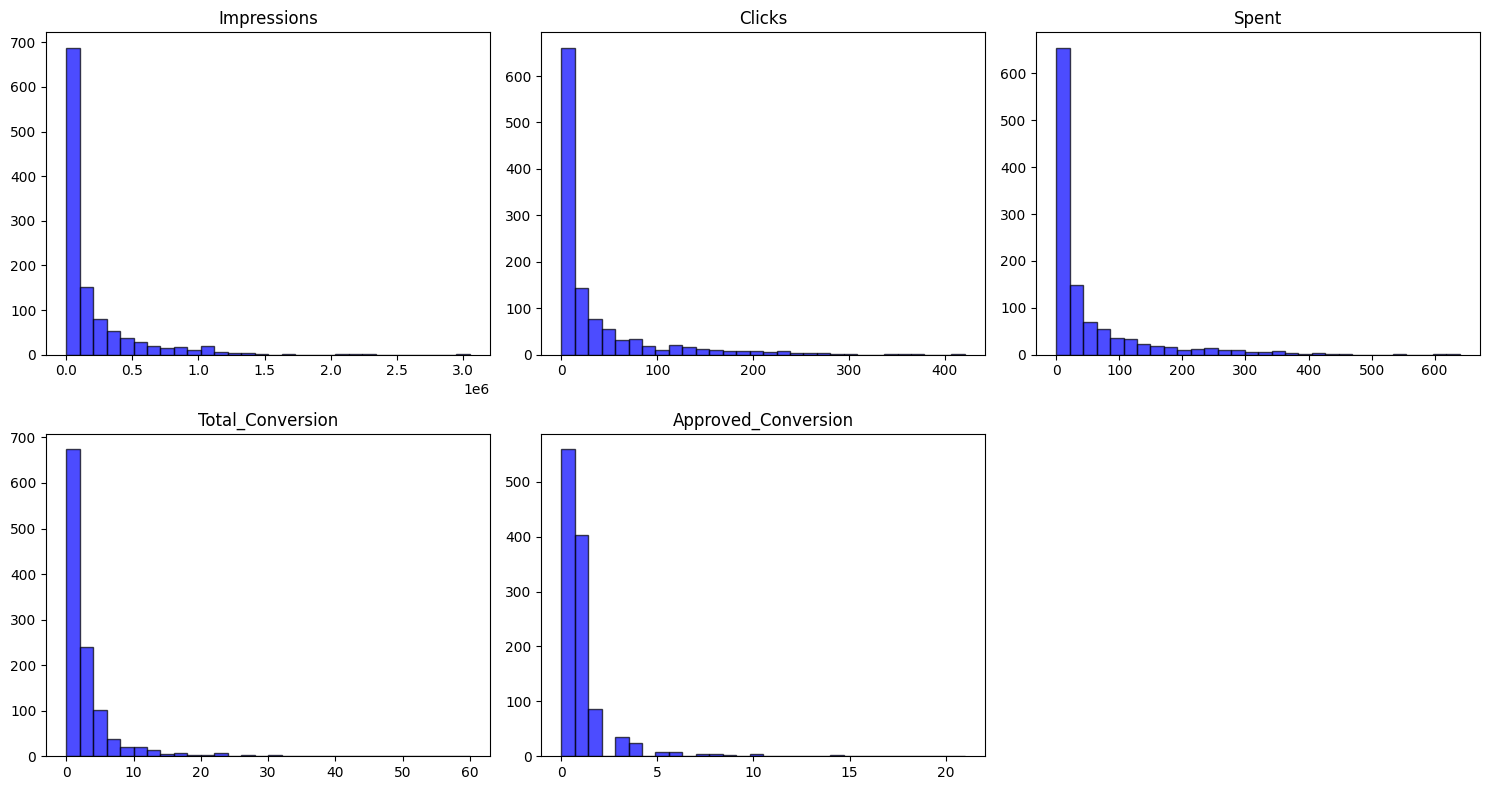

In [11]:
# Set subplot column value
col_val = math.ceil((len(numerical)/2))

# Create 2x3 grid of subplots
fig, axes = plt.subplots(2, col_val, figsize=(15, 8))
axes[1, 2].remove() # Remove unused subplot
axes = axes.flatten()  # Flatten axes array to simplify indexing

# Iterate through the columns of the DataFrame
for i, (column_name, column_data) in enumerate(df[numerical].iteritems()):
    axes[i].hist(column_data, bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(column_name)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

### Bar charts of categorical variables

<ipython-input-12-3f1db086ee4b>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (column_name, column_data) in enumerate(df[categorical].iteritems()):


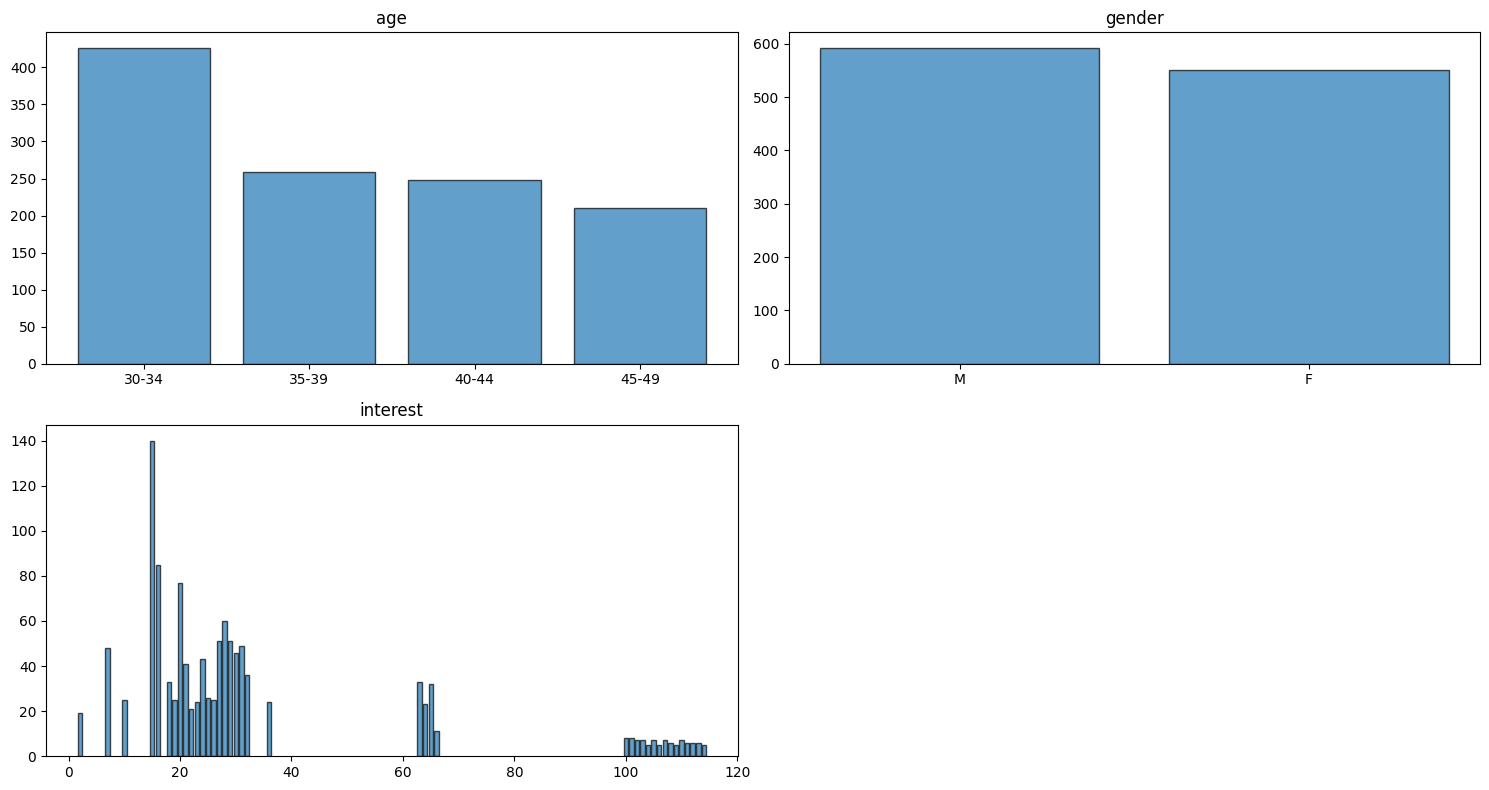

In [12]:
# Set subplot column value
col_val = math.ceil((len(categorical)/2))

# Create 2x3 grid of subplots
fig, axes = plt.subplots(2, col_val, figsize=(15, 8))
axes[1, 1].remove() # Remove unused subplot
axes = axes.flatten()  # Flatten axes array to simplify indexing

# Iterate through the columns of the DataFrame
for i, (column_name, column_data) in enumerate(df[categorical].iteritems()):
    axes[i].bar(column_data.unique(), column_data.value_counts(), alpha=0.7, edgecolor='black')
    axes[i].set_title(column_name)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

### Correlation heatmap



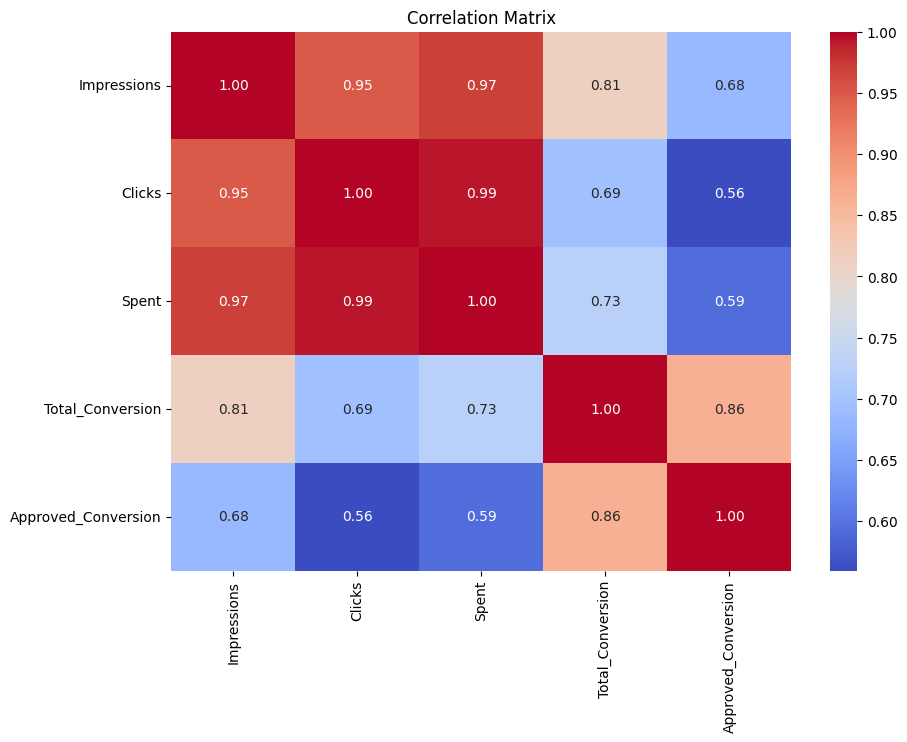

In [13]:
# Select the columns of interest
cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

# Calculate the correlation matrix
corr_matrix = df[cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Pair plots

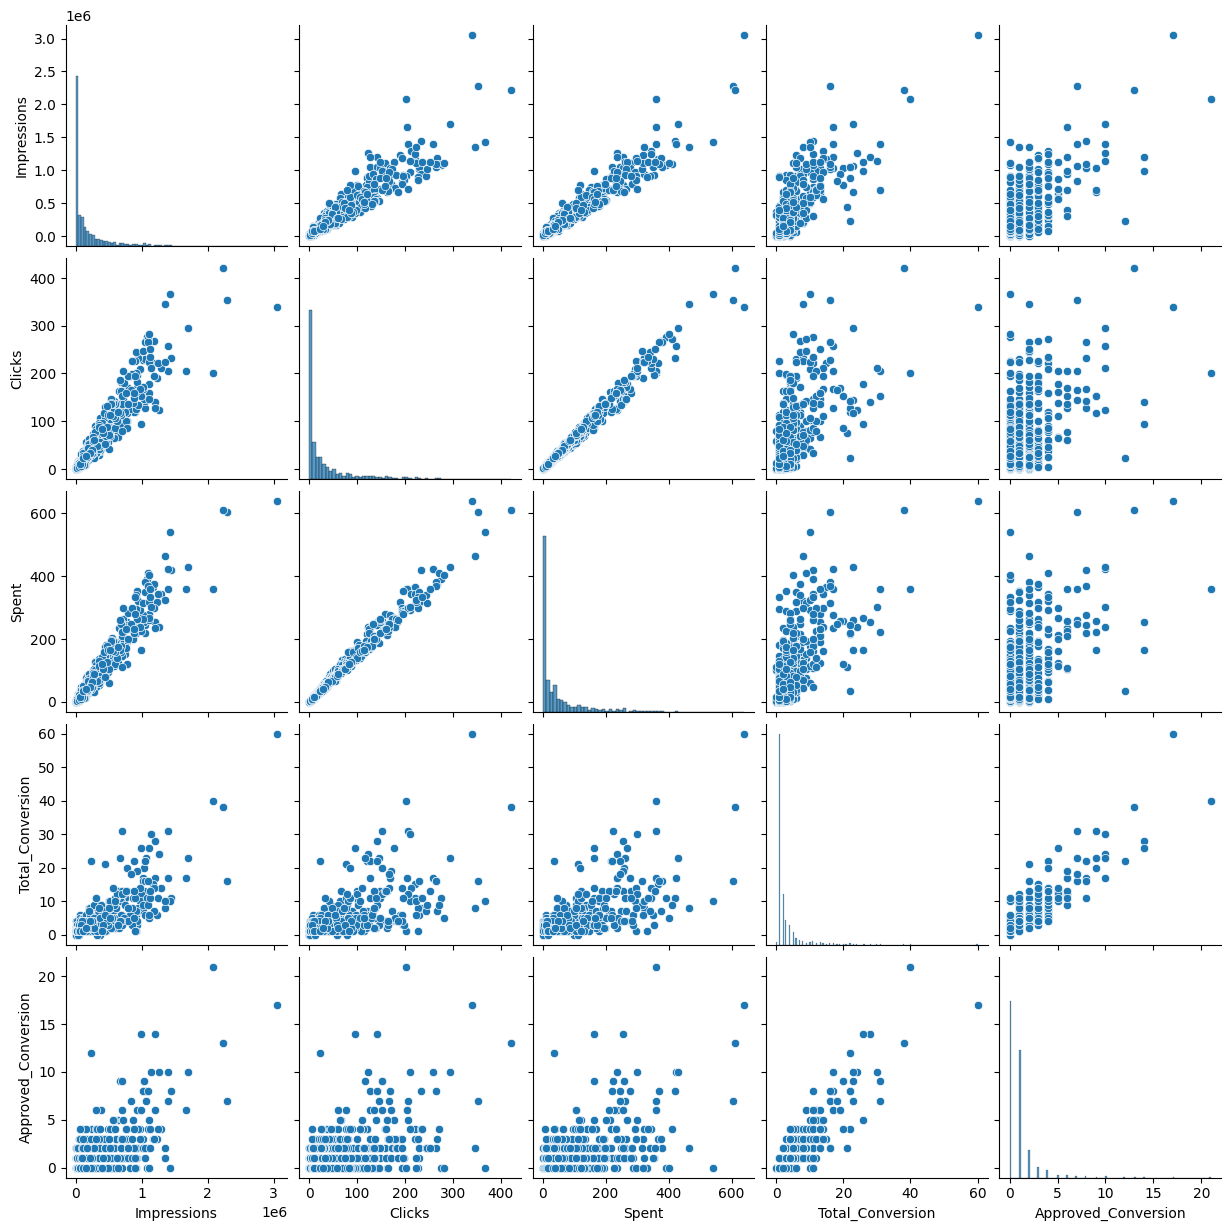

In [14]:
# Create a pair plot
sns.pairplot(data=df[cols])
plt.show()

### Violin plot of approved conversion by age group and gender

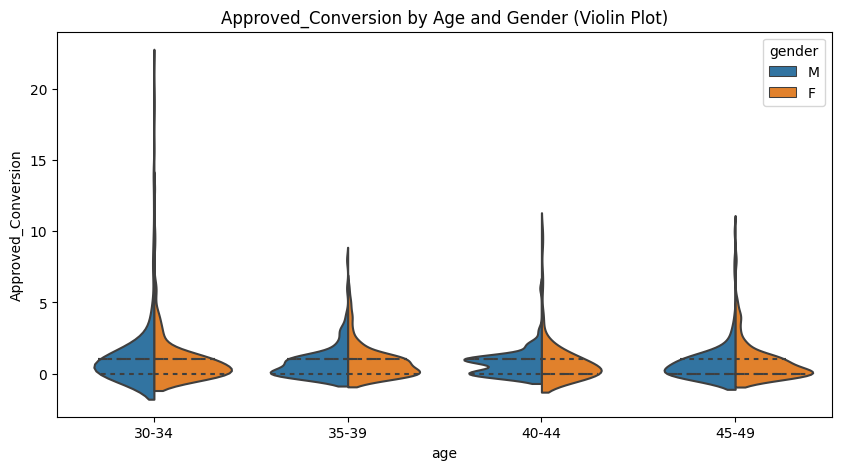

In [15]:
# Violin Plot for age
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='age', y='Approved_Conversion', hue='gender', split=True, inner='quartiles')
plt.title('Approved_Conversion by Age and Gender (Violin Plot)')
plt.show()

## Feature Engineering

In [16]:
# Create Click-Through Rate (CTR) feature
df['CTR'] = df['Clicks'] / df['Impressions'] * 100

# Create Cost per Click (CPC) feature
df['CPC'] = df['Spent'] / df['Clicks']

# Create Cost per Conversion feature
df['Cost_per_Conversion'] = df['Spent'] / df['Approved_Conversion']

# Create Conversion Rate feature
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Total_Conversion'] * 100

# Check the first few rows of the updated dataset
print(df.head())

    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
0         7350       1   1.43                 2                    1   
1        17861       2   1.82                 2                    0   
2          693       0   0.00                 1                    0   
3         4259       1   1.25                 1                    0   
4         4133       1   1.29                 1                    1   

        CTR   CPC  Cost_per_Conversion  Conversion_Rate  
0  0.013605  1.43                 1.43             50.0  
1  0.011198  0.91             

## Data Cleaning

### Check for NaNs and Inf values

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
print()

# Check for infinite values
# Had to drop the categorical columns, isinf() throws an error on non-numeric data
inf_values = df.drop(columns=categorical).apply(lambda x: np.isinf(x).sum())
print(inf_values)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
CPC                    207
Cost_per_Conversion    136
Conversion_Rate          8
dtype: int64

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
CPC                      0
Cost_per_Conversion    423
Conversion_Rate          0
dtype: int64


### Imputing missing values

In [18]:
# Convert categorical variables to numerical format
encoder = OrdinalEncoder()
cat_cols = df[categorical]
df[categorical] = encoder.fit_transform(df[categorical])

# Perform KNN imputation for missing values
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Convert numerical format back to categorical for age and gender
imputed_df[categorical] = encoder.inverse_transform(imputed_df[categorical])

# Check the first few rows of the imputed dataset
print(imputed_df.head())

      ad_id  xyz_campaign_id  fb_campaign_id    age gender interest  \
0  708746.0            916.0        103916.0  30-34      M       15   
1  708749.0            916.0        103917.0  30-34      M       16   
2  708771.0            916.0        103920.0  30-34      M       20   
3  708815.0            916.0        103928.0  30-34      M       28   
4  708818.0            916.0        103928.0  30-34      M       28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
0       7350.0     1.0   1.43               2.0                  1.0   
1      17861.0     2.0   1.82               2.0                  0.0   
2        693.0     0.0   0.00               1.0                  0.0   
3       4259.0     1.0   1.25               1.0                  0.0   
4       4133.0     1.0   1.29               1.0                  1.0   

        CTR    CPC  Cost_per_Conversion  Conversion_Rate  
0  0.013605  1.430                1.430             50.0  
1  0.011198  0.910    

### Addressing outliers

In [19]:
# Define function that winsorizes numerica columns
def winsorize_z_scores_v2(wins_df, columns, threshold):
    for column in columns:

      mean = wins_df[column].mean()
      std = wins_df[column].std()

      upper_bound = mean + (std * threshold)
      lower_bound = mean - (std * threshold)

      wins_df[column] = np.where(wins_df[column] > upper_bound, upper_bound, wins_df[column])
      wins_df[column] = np.where(wins_df[column] < lower_bound, lower_bound, wins_df[column])

    return wins_df

# Apply Winsorizing to the numeric columns with a Z-score threshold of 3
df_winsorized = winsorize_z_scores_v2(imputed_df.copy(), numerical, 3)

# Calculate Z-scores for all columns in imputed dataframe
z_scores = (imputed_df[numerical] - imputed_df[numerical].mean()) / imputed_df[numerical].std()

# Display entries with z_scores greater than 3
print(f"Entries with z-scores over 3: \n{z_scores[z_scores > 3].dropna()}\n")

# Calculate Z-scores for all columns in winsorized dataframe as compared to imputed dataframe
z_scores2 = (df_winsorized[numerical] - imputed_df[numerical].mean()) / imputed_df[numerical].std()

# Display entries with z_scores greater than 3
print(f"Entries in winsorized df with z-scores from imputed df over 3: \n{z_scores2[z_scores2 > 3].dropna()}")


Entries with z-scores over 3: 
     Impressions    Clicks     Spent  Total_Conversion  Approved_Conversion
525     9.161181  5.389289  6.772524         12.745214             9.239753
574     3.854545  3.033967  3.534633          6.277188             3.485046
807     3.853381  3.947973  4.274377          3.154692             5.211458
860     6.511484  6.813028  6.454373          7.838435             6.937870
867     4.855171  4.598323  4.350779          4.492904             5.211458

Entries in winsorized df with z-scores from imputed df over 3: 
Empty DataFrame
Columns: [Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion]
Index: []


### Confirming data types

In [20]:
df_winsorized.dtypes

ad_id                  float64
xyz_campaign_id        float64
fb_campaign_id         float64
age                     object
gender                  object
interest                object
Impressions            float64
Clicks                 float64
Spent                  float64
Total_Conversion       float64
Approved_Conversion    float64
CTR                    float64
CPC                    float64
Cost_per_Conversion    float64
Conversion_Rate        float64
dtype: object

# Formulating Null and Alternative Hypotheses

Null Hypothesis: The difference in mean click through rate (CTR) between age groups **IS NOT** going to be statistically significant.

Alternative Hypothesis: The difference in mean click through rate (CTR) between age groups **IS** going to be statistically significant.

# Preprocessing the Data

## Splitting data

In [21]:
# Splitting the data into A and B groups
group_A = df_winsorized[df_winsorized['age'].isin(['30-34', '35-39'])]
group_B = df_winsorized[df_winsorized['age'].isin(['40-44', '45-49'])]

# Splitting the data into the four age groups
group_1 = df_winsorized[df_winsorized['age'] == '30-34']
group_2 = df_winsorized[df_winsorized['age'] == '35-39']
group_3 = df_winsorized[df_winsorized['age'] == '40-44']
group_4 = df_winsorized[df_winsorized['age'] == '45-49']

# Statistical Test Selection

Because the data is not normally distributed and it's continuous, we will go with the Mann-Whitney U test for an A and B group (A: age 30-39, B: age 40-49). We will also use the Kruskal-Wallis H test to determine if there is a significant difference between all four groups.

## Mann-Whitney U test

In [22]:
# Perform the Mann-Whitney U test comparing the CTRs of the two groups
u_stat, p_value_u = mannwhitneyu(group_A['CTR'], group_B['CTR'], alternative='two-sided')

# Print the U-statistic and p-value
print("U-statistic:", u_stat)
print("P-value:", p_value_u)

U-statistic: 90436.0
P-value: 4.634899794567662e-35


## Kruskal-Wallis H test

In [23]:
# Perform the Kruskal-Wallis H test comparing the conversion rates of the four age groups
h_stat, p_value_k = kruskal(group_1['CTR'], group_2['CTR'], group_3['CTR'], group_4['CTR'])

# Print the H-statistic and p-value
print("H-statistic:", h_stat)
print("P-value:", p_value_k)

H-statistic: 185.9782254115025
P-value: 4.511585863626081e-40


# Determine Significance Level

In [24]:
# Set alpha
alpha = 0.05

# Test Results

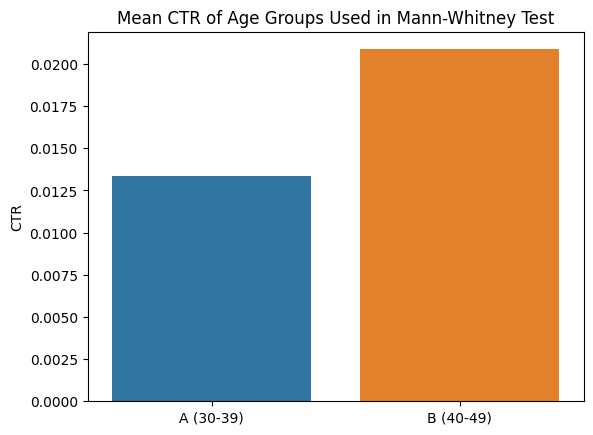

Mann-Whitney U Test:
P-value: 4.634899794567662e-35
Reject the null hypothesis: There is a significant difference in CTRs between Group A and Group B.


In [25]:
# Create list to hold AB group means
MW_y = []

# Append group means to list
MW_y.append(group_A['CTR'].mean())
MW_y.append(group_B['CTR'].mean())

#Visualize differences in group means
MW_x = ['A (30-39)', 'B (40-49)']
sns.barplot(x = MW_x, y = MW_y)
plt.title('Mean CTR of Age Groups Used in Mann-Whitney Test')
plt.ylabel('CTR')
plt.show()

# Interpret the results from the Mann-Whitney U test
print("Mann-Whitney U Test:")
print("P-value:", p_value_u)
if p_value_u < alpha:
    print("Reject the null hypothesis: There is a significant difference in CTRs between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CTRs between Group A and Group B.")

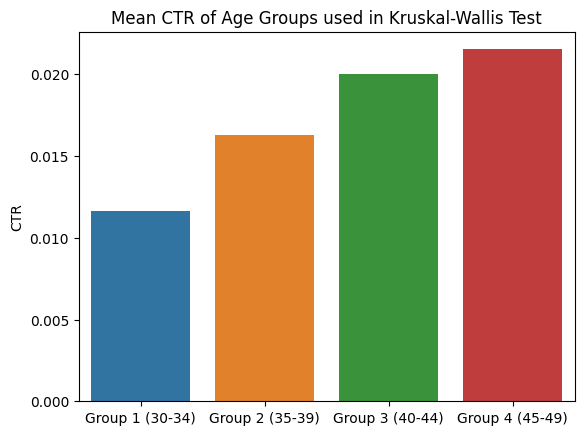


Kruskal Wallis H Test:
P-value: 4.511585863626081e-40
Reject the null hypothesis: There is a significant difference in CTRs between the four age groups.


In [26]:
# Create list to hold four group means
KW_y = []

# Append group means to list
KW_y.append(group_1['CTR'].mean())
KW_y.append(group_2['CTR'].mean())
KW_y.append(group_3['CTR'].mean())
KW_y.append(group_4['CTR'].mean())

#Visualize differences in group means
KW_x = ['Group 1 (30-34)', 'Group 2 (35-39)','Group 3 (40-44)','Group 4 (45-49)']
sns.barplot(x = KW_x, y = KW_y)
plt.title('Mean CTR of Age Groups used in Kruskal-Wallis Test')
plt.ylabel('CTR')
plt.show()

# Interpret the results from the Kruskal_wallis H test
print("\nKruskal Wallis H Test:")
print("P-value:", p_value_k)
if p_value_k < alpha:
    print("Reject the null hypothesis: There is a significant difference in CTRs between the four age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CTRs between the four age groups.")

# Caculating Effect Size

## Mann-Whitney U Test

In [27]:
# Calculate the sample sizes of the two groups
n1 = len(group_A)
n2 = len(group_B)

# Calculate the rank-biserial correlation
rank_biserial_corr = 1 - (2 * u_stat) / (n1 * n2)

# Print the rank-biserial correlation value
print("Rank-biserial correlation:", rank_biserial_corr)

Rank-biserial correlation: 0.42781218958197564


## Kruskal-Wallis H Test

In [28]:
# Calculate the total number of observations
N = len(df_winsorized)

# Set the number of groups
k = 4

# Calculate Eta-squared
eta_squared = (h_stat - k + 1) / (N - k)

# Print the Eta-squared value
print("Eta-squared:", eta_squared)

Eta-squared: 0.16064813468964223


# Conclusion and Recommendations

### **Mann-Whitney Test**
**Objective:** Assess whether there's a difference in click through rate (CTR) between two age groups in the data.

Group A: ages 30-39
* mean: 0.013

Group B: ages 40-49
* mean: 0.021

At a p-value of 0.05, the Mann-Whitney test found a statistically siginificant difference in CTR between groups.

Calculating effect size using rank-biserial correlation gave a value of 0.42, which corresponds to a **medium effect**.

***Recommendations***:
1. Adjust marketing strategies to better target the age group with a higher CTR (Group B '40-49').
2. Allocate more resources to the age group with the higher CTR, since they have a better response to the marketing efforts.
3. Conduct further analysis to identify the factors within each age group that contribute to the differences in CTR (e.g., preferences for specific types of content or ads).

### **Kruskal-Wallis Test**
**Objective:** Assess whether there's a difference in click through rate (CTR) between all four age groups in the data.

Group 1: ages 30-34
* mean: 0.012

Group 2: ages 35-39
* mean: 0.016

Group 3: ages 40-44
* mean: 0.020

Group 4: ages 45-49
* mean: 0.022

At a p-value of 0.05, the Kruskal-Wallis test found a statistically siginificant difference in CTR between groups.

Calculating effect size using Eta-squared gave a value of 0.16, which corresponds to a **large effect**.

***Recommendations***:
1. Prioritize the age group(s) with higher conversion rates for marketing campaigns, as they demonstrate stronger engagement with the ads or content.
2. Investigate the reasons for the low conversion rates in the other age group(s) and propose changes in marketing strategy or content to improve their engagement.
3. Consider a separate marketing strategy or user experience for each age group to better cater to their preferences and improve overall conversion rates.